In [4]:
from scipy.stats import median_abs_deviation

import sys
sys.path.insert(0, '/home/workspace/mm_analysis')
sys.path.insert(0, '/home/workspace/')

from py_util import *
from utilities import *

hdir = '/home/workspace'
wdir = hdir + "/mm_analysis/EXP-01244"
objdir = wdir + "/processing/objects/"
degdir = wdir + "/deg_list/"

adata = sc.read_h5ad(objdir + "not_ds_processed_all_organoids_adata.h5ad")

adata_type = "All Organoids (not downsampled)"

l1 = {cluster: cluster for cluster in sorted(adata.obs['leiden_0_3'].unique(), key=int)}

# UMAPs

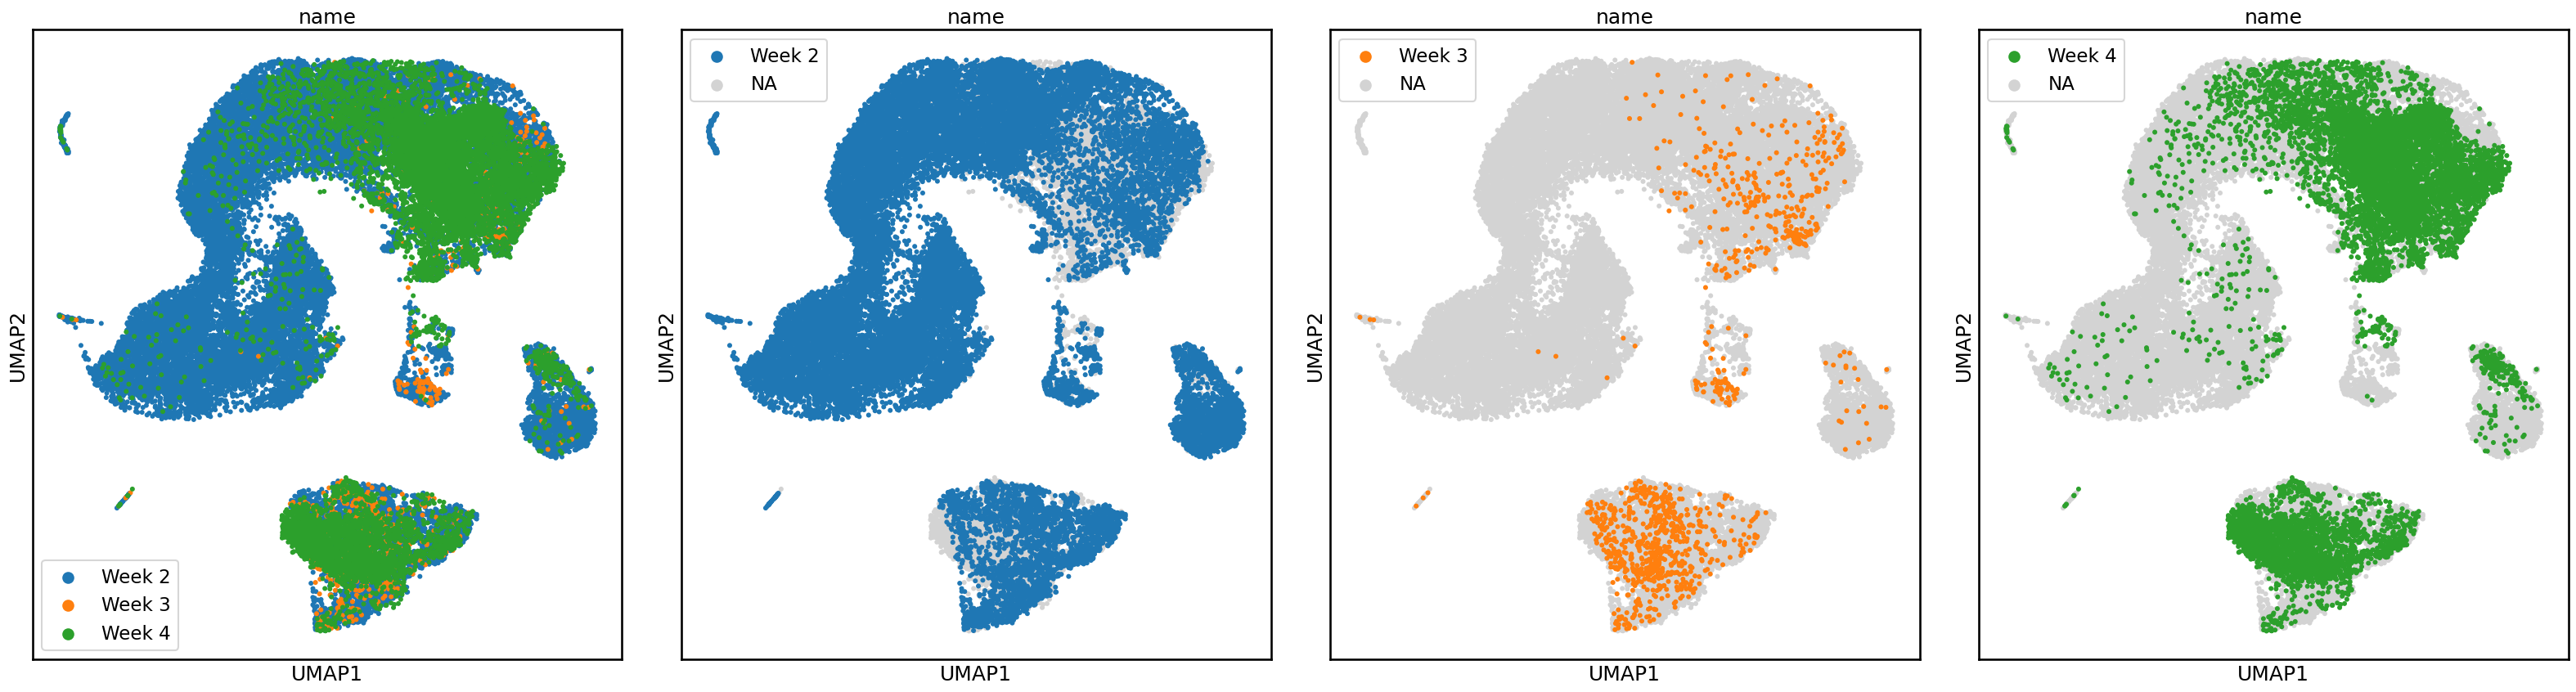

In [5]:
fig, ax, idx = subplot_grids(4, aspect_ratio=4, gridspec_kw={'wspace': 0.1})

for i in idx:
    sc.pl.umap(
        adata,
        color='name',
        groups='Week 2' if i == idx[1] else ('Week 3' if i == idx[2] else ('Week 4' if i == idx[3] else None)),
        show=False,
        ax=ax[i],
        legend_loc='best',
        size=75
    )

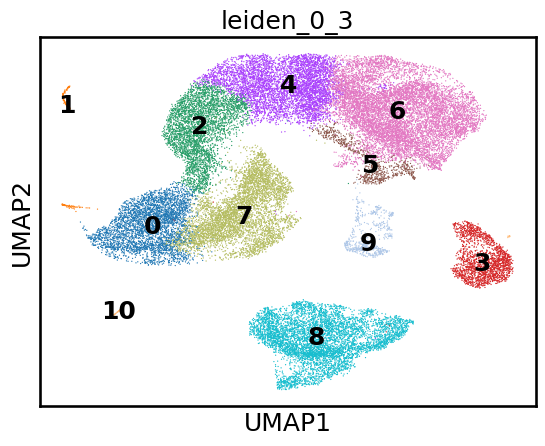

In [6]:
sc.pl.umap(
    adata,
    color='leiden_0_3',
    legend_loc='on data'
)

# DEG's

In [34]:
sc.tl.rank_genes_groups(
    adata,
    groupby='leiden_0_3',
    method='wilcoxon',
    key_added='ranke_genes_groups_l1'
)

ranking = adata.uns['ranke_genes_groups_l1']
gene_names = ranking['names']
gene_z_scores = ranking['scores']
gene_logfold = ranking['logfoldchanges']
gene_pvals_adj = ranking['pvals_adj']
clusters = gene_names.dtype.names

df_de_genes = pd.DataFrame()

for cluster in clusters:
    names = gene_names[cluster]
    logfold = gene_logfold[cluster]
    z_scores = gene_z_scores[cluster]
    pvals_adj = gene_pvals_adj[cluster]

    # All genes 
    cluster_df = pd.DataFrame({
        f'C{cluster}_names': names,
        f'C{cluster}_logfold': logfold,
        f'C{cluster}_pvals_adj': pvals_adj,
        f'C{cluster}_z_score': z_scores
    })

    if df_de_genes.empty:
        df_de_genes = cluster_df
    else:
        df_de_genes = pd.merge(df_de_genes, cluster_df, left_index=True, right_index=True, how='outer')

df_de_genes.to_csv(degdir + 'adjusted_not_ds_l1_all_organoids_DEGs.csv', index=False)

# Cluster (0, 7)

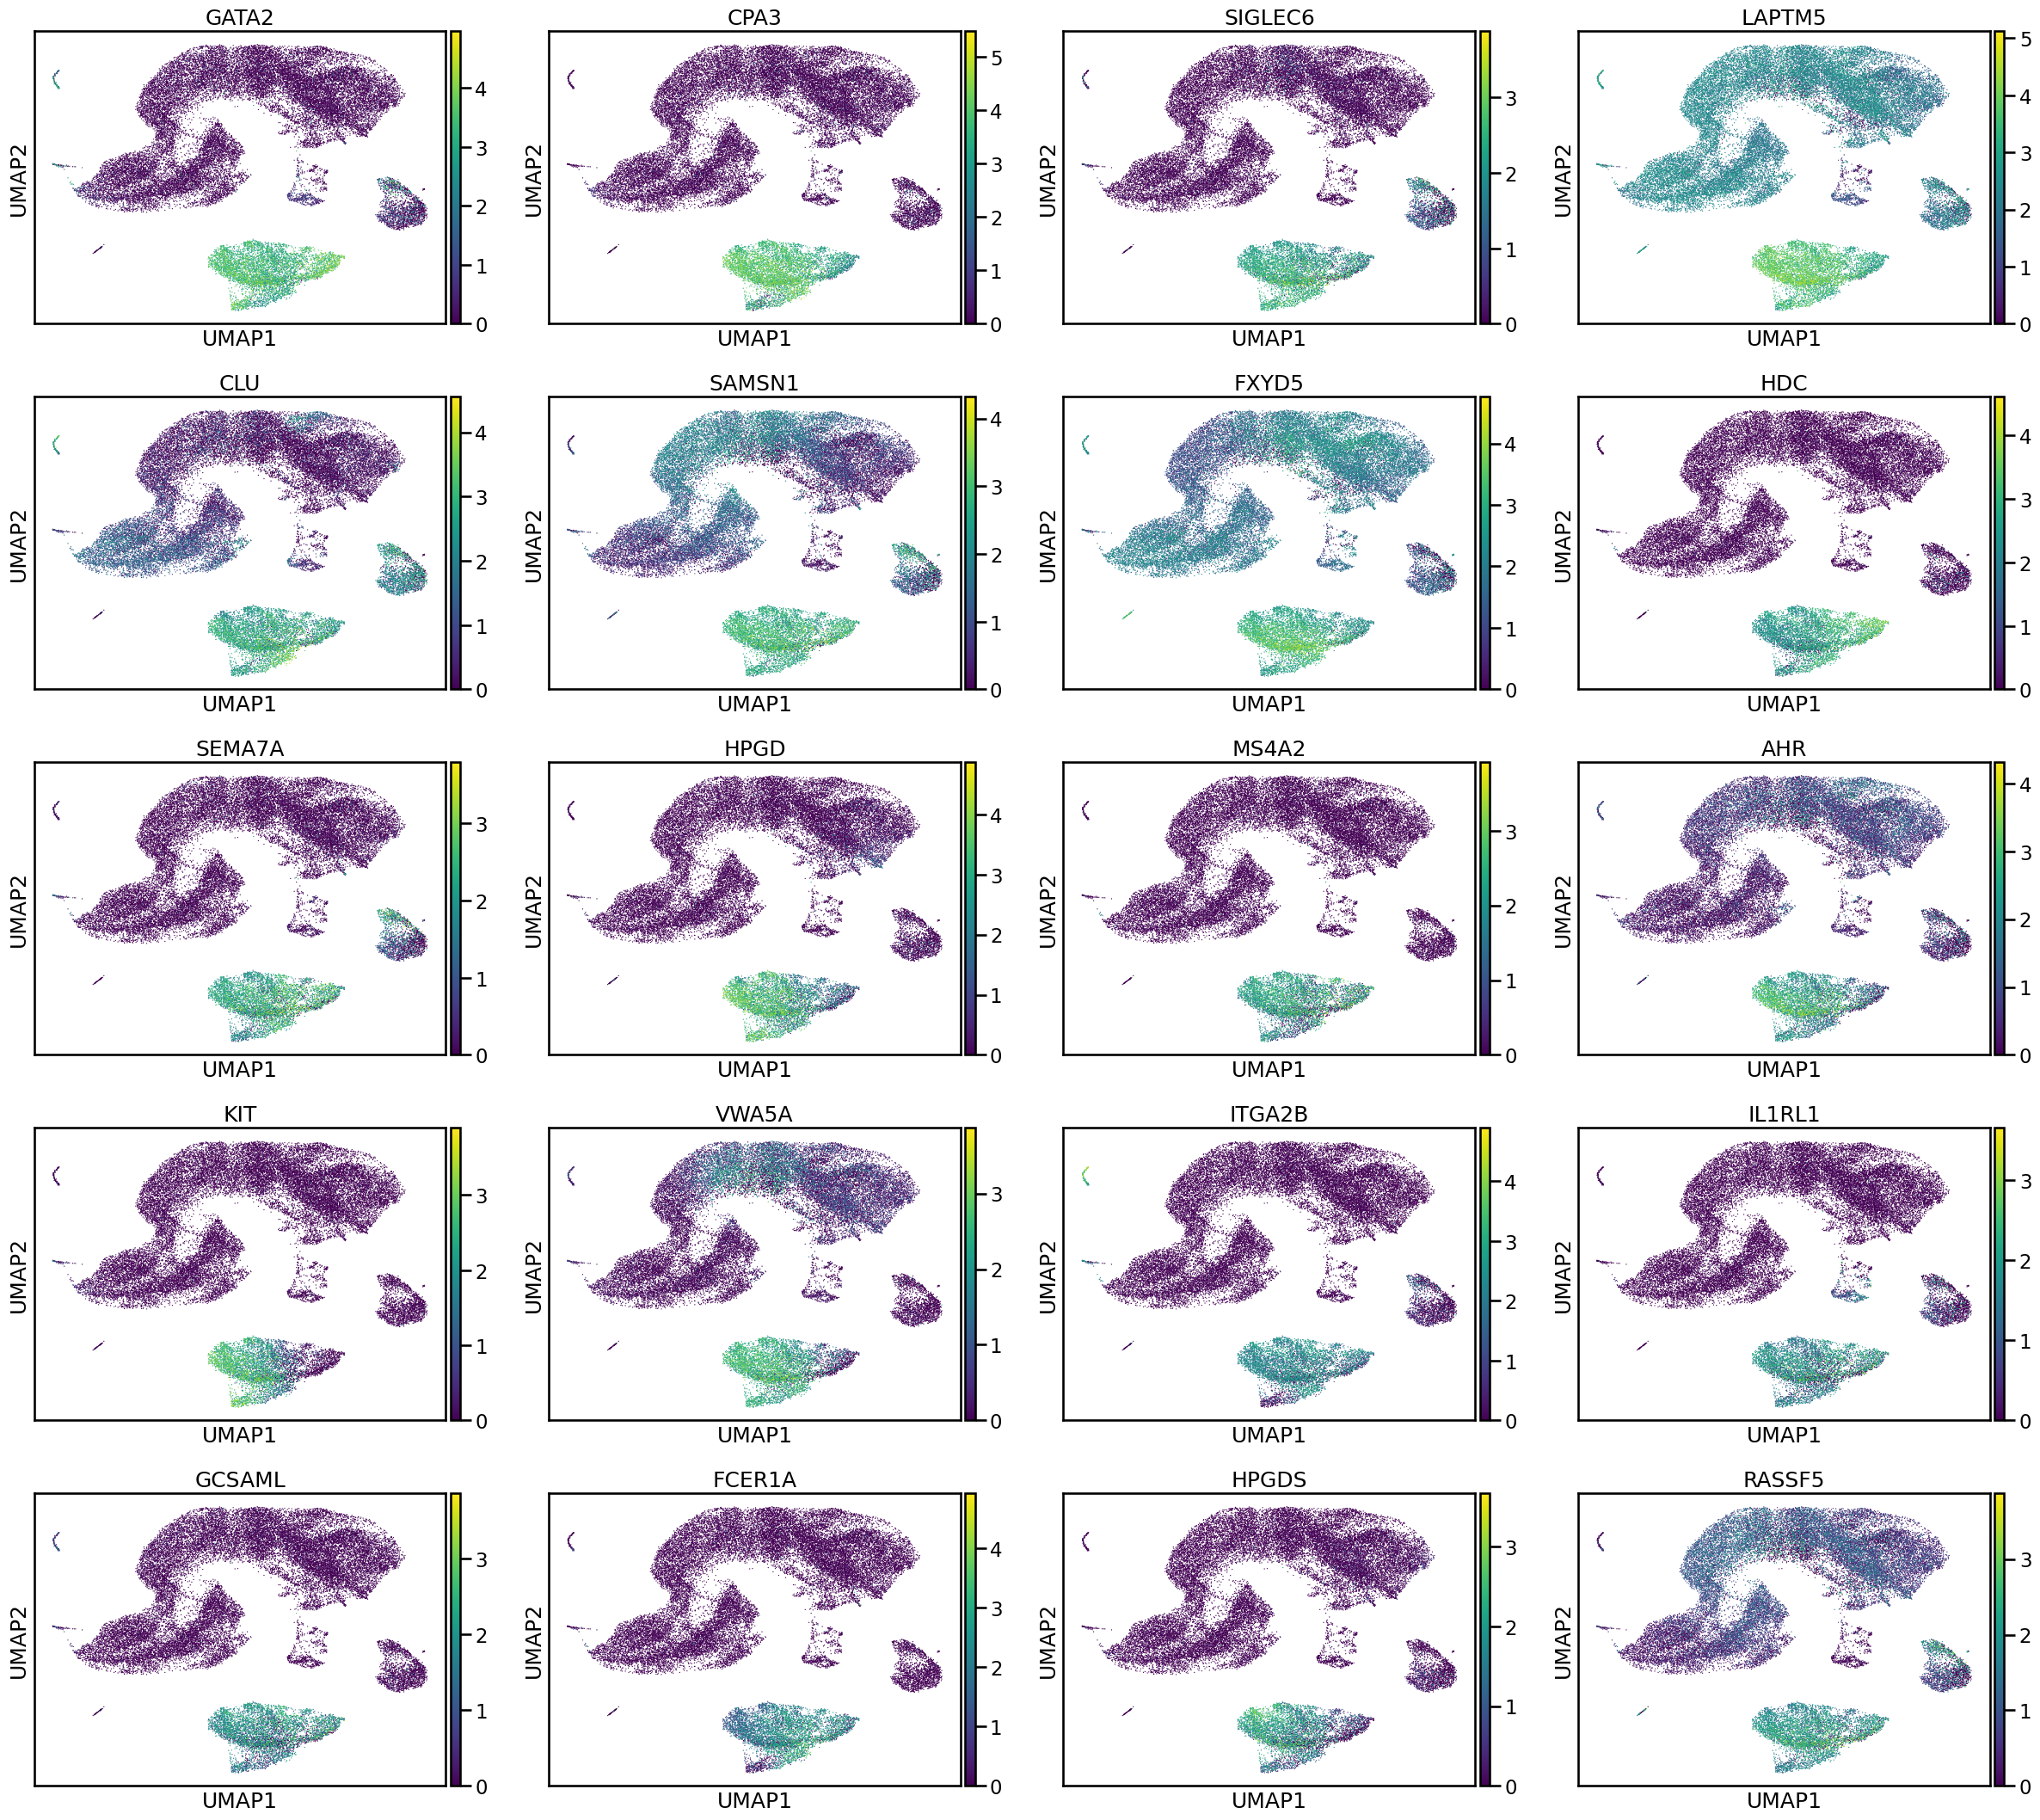

In [3]:
markers = ['GATA2', 'CPA3', 'SIGLEC6', 'LAPTM5', 'CLU', 'SAMSN1', 'FXYD5', 'HDC', 'SEMA7A', 'HPGD', 'MS4A2', 'AHR', 'KIT', 'VWA5A', 'ITGA2B', 'IL1RL1', 'GCSAML', 'FCER1A', 'HPGDS', 'RASSF5']

sc.pl.umap(
    adata,
    color=markers
)